<a href="https://colab.research.google.com/github/nihal-das-cv/iris_classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris["data"])
df["label"] = pd.DataFrame(data=iris["target"])

column_names = [name.replace(" (cm)", "").replace(" ", "_") for name in iris["feature_names"]] + ["label"]
df.columns = column_names

display(df.head(3))

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [2]:
for item in df["label"].unique():
    print(f"Label: {item}, Target_Name: {iris.target_names[item].capitalize()}")

Label: 0, Target_Name: Setosa
Label: 1, Target_Name: Versicolor
Label: 2, Target_Name: Virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])

Total rows: 150
Total columns: 5


In [6]:
print("Total null values:", df.isnull().sum().sum())

Total null values: 0


In [7]:
print("Total duplicated values:", df.duplicated().sum())

Total duplicated values: 1


In [8]:
df.drop_duplicates(inplace=True)

print("Total rows after deleting duplicates:", df.shape[0])
print("Total columns after deleting duplicates:", df.shape[1])

Total rows after deleting duplicates: 149
Total columns after deleting duplicates: 5


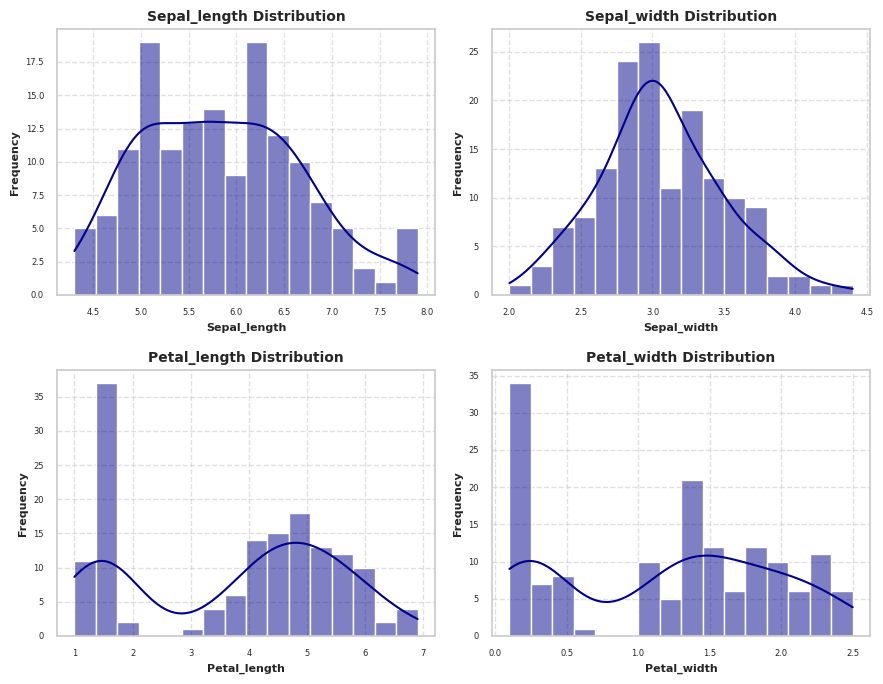

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

columns = df.drop(columns=["label"]).columns

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()

for i, column in enumerate(columns):
  sns.histplot(data=df, x=column, kde=True, color="darkblue", ax=axes[i], bins=16)

  axes[i].set_title(f"{column.capitalize()} Distribution", fontsize=10, fontweight="bold")
  axes[i].set_xlabel(column.capitalize(), fontsize=8, fontweight="semibold")
  axes[i].set_ylabel("Frequency", fontsize=8, fontweight="semibold")
  axes[i].tick_params(axis="both", which="major", labelsize=6, color="black")
  axes[i].grid(visible=True, zorder=0, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

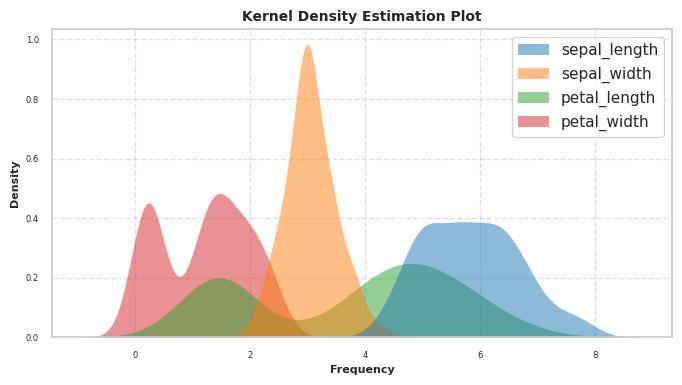

In [10]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 4))
plt.title("Kernel Density Estimation Plot", fontsize=10, fontweight="bold")

ax = plt.gca()

ax.set_xlabel("Frequency", fontsize=8, fontweight="semibold")
ax.set_ylabel("Density", fontsize=8, fontweight="semibold")
ax.tick_params(axis="both", which="major", labelsize=6, color="black")

sns.kdeplot(data=df.drop(columns=["label"]).copy(), linewidth=0, palette="tab10", multiple="layer", alpha=0.5, fill=True, common_norm=False)

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

***** **bold text**

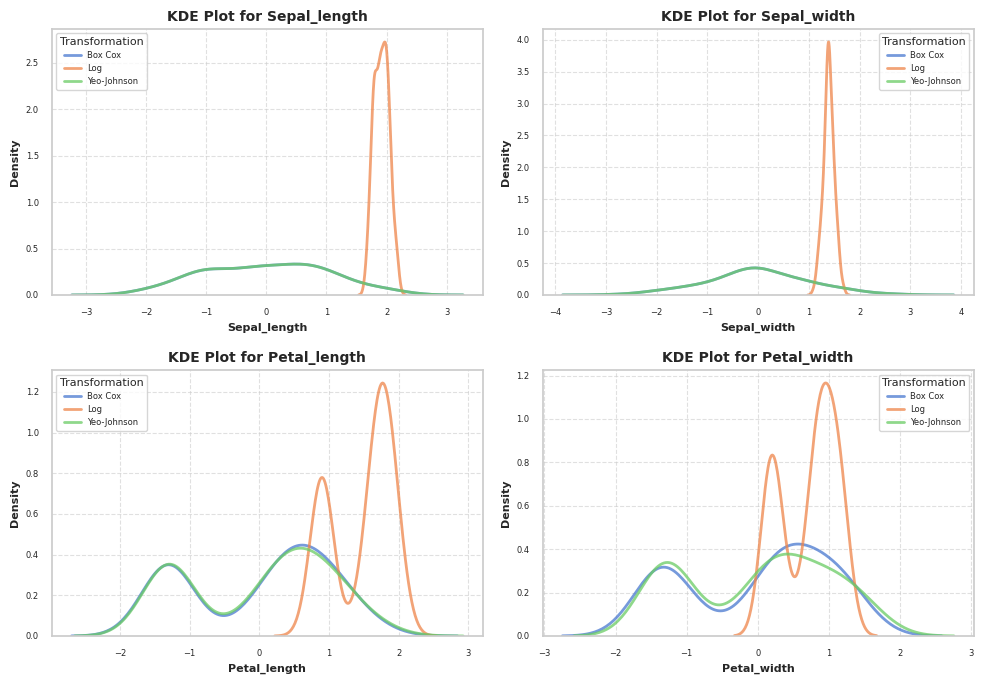

In [11]:
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
import numpy as np
import math

sns.set_theme(style="whitegrid", palette="muted")

transformers = {
    "Box Cox": PowerTransformer(method="box-cox"),
    "Log": FunctionTransformer(func=np.log1p, inverse_func=np.expm1),
    "Yeo-Johnson": PowerTransformer(method="yeo-johnson")
}

n_cols = 2
n_rows = math.ceil(len(columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 3.5))
axes = axes.flatten()

palette = sns.color_palette("Set2", n_colors=len(transformers))

transformed_df = pd.DataFrame()

for idx, column in enumerate(columns):
    ax = axes[idx]
    transformed_data = df[[column]].copy()

    for i, (name, transformer) in enumerate(transformers.items()):
        transformed_data[f"{column}_{name}"] = transformer.fit_transform(df[[column]])

        transformed_df[f"{column}_{name}"] = transformed_data[f"{column}_{name}"]

        sns.kdeplot(
            transformed_data[f"{column}_{name}"],
            label=name,
            linewidth=2,
            alpha=0.75,
            ax=ax,
        )

    ax.set_title(f"KDE Plot for {column.capitalize()}", fontsize=10, fontweight="bold")
    ax.set_xlabel(column.capitalize(), fontsize=8, fontweight="semibold")
    ax.set_ylabel("Density", fontsize=8, fontweight="semibold")
    ax.tick_params(axis="both", which="major", labelsize=6)

    ax.grid(True, linestyle="--", linewidth=0.8, alpha=0.6)
    ax.legend(title="Transformation", fontsize=6, title_fontsize=8, loc="best", frameon=True)

plt.tight_layout()
plt.show()

In [12]:
from tabulate import tabulate

dummy_df = pd.concat([df.drop(columns=["label"]).copy(), transformed_df], axis=1)

headers = ["#", "Feature", "Skewness", "Kurtosis"]
table = []

for i, column in enumerate(dummy_df.columns, 1):
    row = [
        i,
        column.capitalize(),
        f"{dummy_df[column].skew():.4f}",
        f"{dummy_df[column].kurt():.4f}",
    ]

    table.append(row)

markdown_table = tabulate(table, headers=headers, tablefmt="github")

print(markdown_table)

|   # | Feature                  |   Skewness |   Kurtosis |
|-----|--------------------------|------------|------------|
|   1 | Sepal_length             |     0.3128 |    -0.569  |
|   2 | Sepal_width              |     0.3071 |     0.2262 |
|   3 | Petal_length             |    -0.2631 |    -1.4083 |
|   4 | Petal_width              |    -0.0901 |    -1.34   |
|   5 | Sepal_length_box cox     |     0.0054 |    -0.7606 |
|   6 | Sepal_length_log         |     0.0825 |    -0.74   |
|   7 | Sepal_length_yeo-johnson |     0.0101 |    -0.7636 |
|   8 | Sepal_width_box cox      |     0.0009 |     0.1069 |
|   9 | Sepal_width_log          |    -0.0258 |     0.097  |
|  10 | Sepal_width_yeo-johnson  |     0.0001 |     0.0963 |
|  11 | Petal_length_box cox     |    -0.2961 |    -1.4209 |
|  12 | Petal_length_log         |    -0.5112 |    -1.4418 |
|  13 | Petal_length_yeo-johnson |    -0.2419 |    -1.3984 |
|  14 | Petal_width_box cox      |    -0.3387 |    -1.3729 |
|  15 | Petal_width_log 

In [20]:
best_overall_transformation = {}

for column in columns:
    original_skew = dummy_df[column].skew()
    original_kurtosis = dummy_df[column].kurt()

    # Calculate the combined distance from zero for original data
    best_distance = abs(original_skew) + abs(original_kurtosis)
    best_method = "Original"

    for name in transformers.keys():
        transformed_skew = dummy_df[f"{column}_{name}"].skew()
        transformed_kurtosis = dummy_df[f"{column}_{name}"].kurt()

        # Calculate the combined distance from zero for transformed data
        transformed_distance = abs(transformed_skew) + abs(transformed_kurtosis)

        if transformed_distance < best_distance:
            best_distance = transformed_distance
            best_method = name

    best_overall_transformation[column] = best_method

print("Overall Best Transformation Technique for Each Feature (considering both skewness and kurtosis):\n")
for feature, transformation in best_overall_transformation.items():
    print(f"Feature: {feature.capitalize()}")
    print(f"  Best Overall Transformation: {transformation}")
    print("-" * 30)

Overall Best Transformation Technique for Each Feature (considering both skewness and kurtosis):

Feature: Sepal_length
  Best Overall Transformation: Box Cox
------------------------------
Feature: Sepal_width
  Best Overall Transformation: Yeo-Johnson
------------------------------
Feature: Petal_length
  Best Overall Transformation: Yeo-Johnson
------------------------------
Feature: Petal_width
  Best Overall Transformation: Original
------------------------------


********* **bold text**

In [22]:
for column in df.drop(columns=["label"]).columns:
  if best_overall_transformation[column] != "Original":
    df[column] = transformers[best_overall_transformation[column]].fit_transform(df[[column]])

ValueError: The Box-Cox transformation can only be applied to strictly positive data

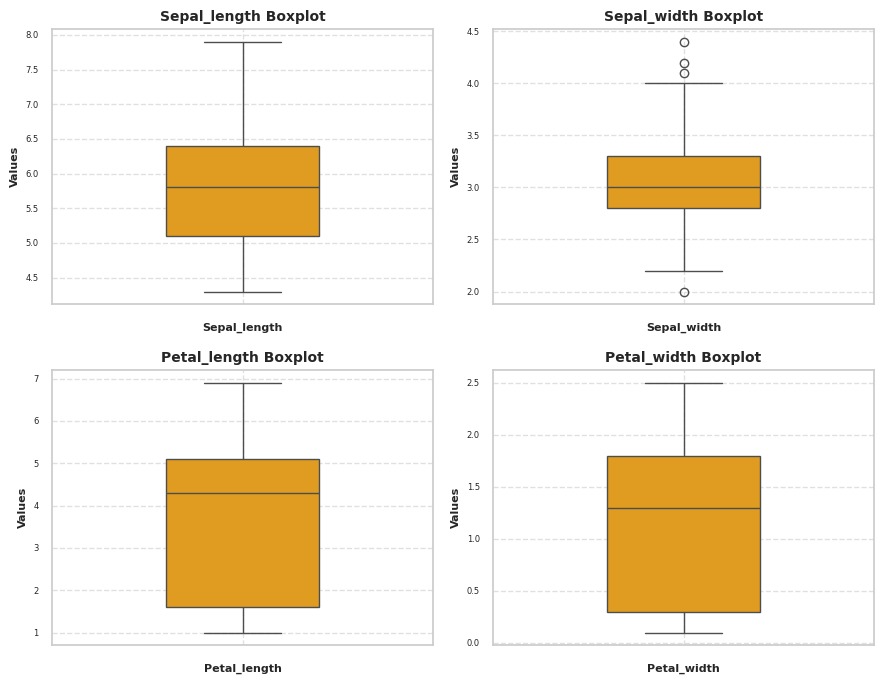

In [14]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()

for i, column in enumerate(columns):
  sns.boxplot(data=df, y=column, ax=axes[i], color="orange", width=0.4)

  axes[i].set_title(f"{column.capitalize()} Boxplot", fontsize=10, fontweight="bold")
  axes[i].set_xlabel(column.capitalize(), fontsize=8, fontweight="semibold")
  axes[i].set_ylabel("Values", fontsize=8, fontweight="semibold")
  axes[i].tick_params(axis="both", which="major", labelsize=6, color="black")
  axes[i].grid(visible=True, zorder=0, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

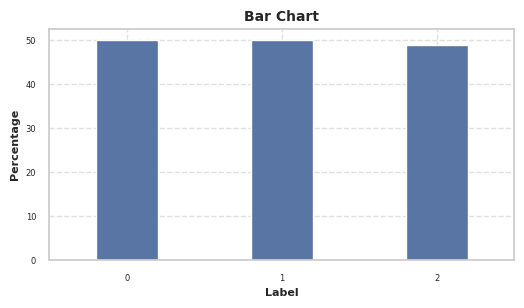

In [15]:
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(6, 3))
plt.title("Bar Chart", fontsize=10, fontweight="bold")

ax = plt.gca()

sns.countplot(x="label", data=df, width=0.4)

ax.set_xlabel("Label", fontsize=8, fontweight="semibold")
ax.set_ylabel("Percentage", fontsize=8, fontweight="semibold")
ax.tick_params(axis="both", which="major", labelsize=6, color="black")

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [16]:
label_percentage = df["label"].value_counts(normalize=True) * 100

print("----- Class Distribution -----\n")

for label, percentage in label_percentage.items():
  print(f"Class: {iris.target_names[label].capitalize()}, Distribution: {percentage:.2f}%")

----- Class Distribution -----

Class: Setosa, Distribution: 33.56%
Class: Versicolor, Distribution: 33.56%
Class: Virginica, Distribution: 32.89%


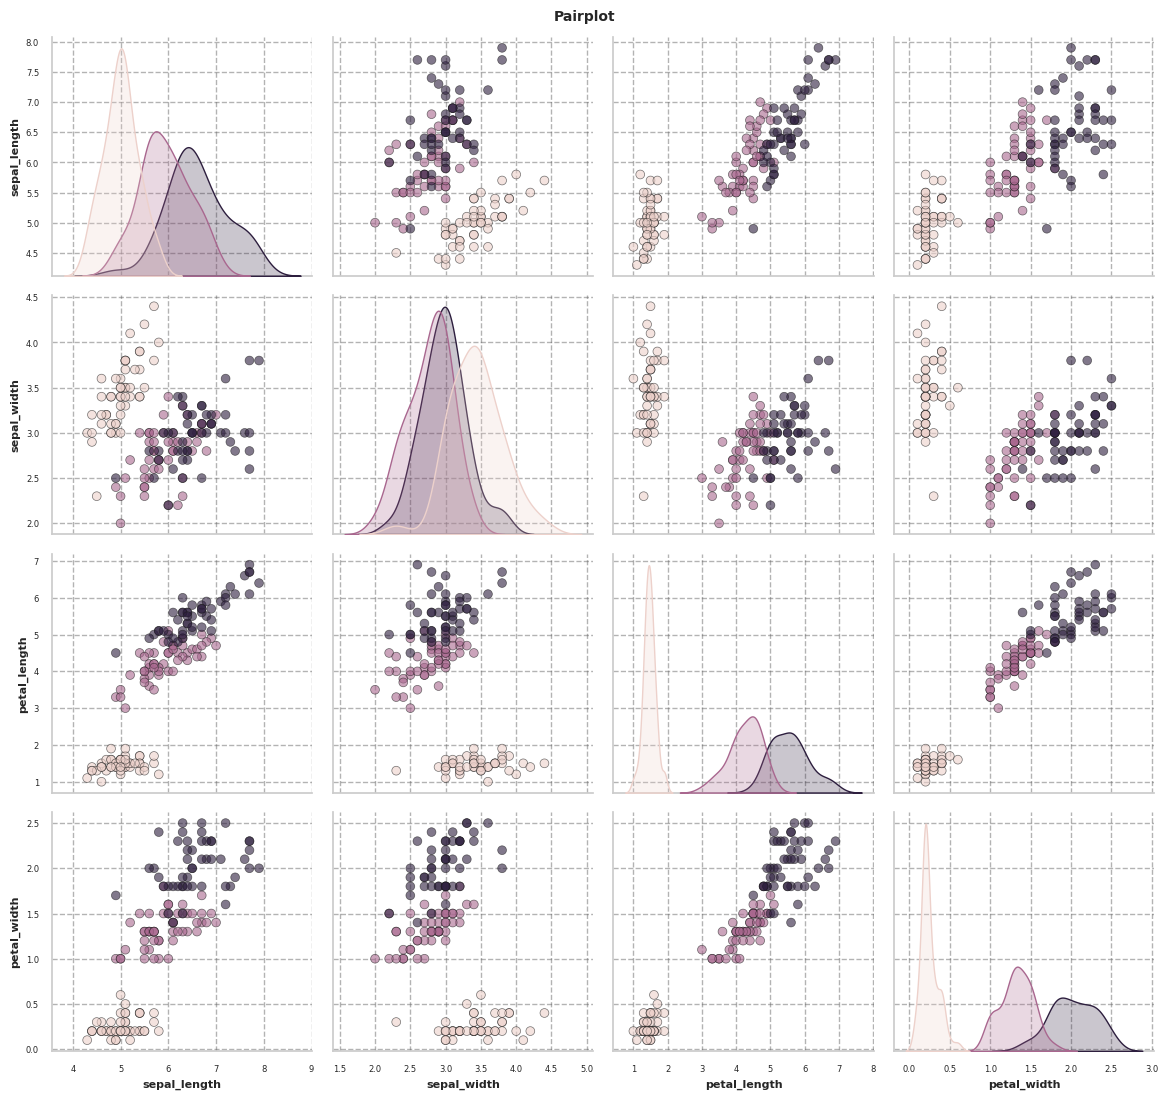

In [17]:
sns.set_theme(style="whitegrid", palette="muted")

pairplot = sns.pairplot(data=df, hue="label", plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"}, diag_kws={"fill": True, "color": "skyblue"}, height=2.8,)

pairplot.fig.suptitle("Pairplot", fontsize=10, fontweight="bold")

for i, ax in enumerate(pairplot.axes.flat):
  ax.xaxis.label.set_size(8)
  ax.xaxis.label.set_fontweight("semibold")

  ax.yaxis.label.set_size(8)
  ax.yaxis.label.set_fontweight("semibold")

  ax.tick_params(axis="both", which="major", labelsize=6, color="dimgray")
  ax.grid(True, color="dimgray", linestyle="--", alpha=0.5)

pairplot._legend.remove()

plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

models = {
    "Gradient Boosting": Pipeline([
        ("model", GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
    ]),
    "K-Nearest Neighbors": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=3))
    ]),
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression())
    ]),
    "Decision Tree": Pipeline([
        ("model", DecisionTreeClassifier())
    ]),
    "Random Forest": Pipeline([
        ("model", RandomForestClassifier(max_depth=2))
    ]),
    "Support Vector Machine": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(gamma="auto"))
    ]),
    "Naive Bayes": Pipeline([
        ("scaler", StandardScaler()),
        ("model", GaussianNB())
    ])
}

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["label"]), df["label"], test_size=0.2, random_state=42)

In [32]:
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc*100}%")

Gradient Boosting Accuracy: 93.33333333333333%
K-Nearest Neighbors Accuracy: 100.0%
Logistic Regression Accuracy: 100.0%
Decision Tree Accuracy: 100.0%
Random Forest Accuracy: 100.0%
Support Vector Machine Accuracy: 100.0%
Naive Bayes Accuracy: 100.0%


In [28]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])